This notebook is for initial analysis of two-layer shallow water model runs for different wind stress magnitudes. For details on wind stress profile and topography, refer to notebook used for createing input files.

In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import dask
import dask.distributed
from xgcm import Grid
%matplotlib inline

#from dask.distributed import Client
#from dask.distributed import LocalCluster
#cluster = LocalCluster()
#client = Client(cluster)
#client

In [2]:
# read ocean.stats files for all runs
tau = ['Tau_001', 'Tau_003', 'Tau_005', 'Tau_01', 'Tau_03', 'Tau_05', 'Tau_1']
ppdir = "/work/Hemant.Khatri/MOM6_idealised/SWM_Two_Layer/Barotropic_Baroclinic/"

dataset_FW = []
dataset_VW = []

for i in range(0, len(tau)):
    d = xr.open_dataset(ppdir+"2L_fplane_Fix_Width/"+tau[i]+"/ocean.stats_50.nc") 
    dataset_FW.append(d)
    d = xr.open_dataset(ppdir+"2L_fplane_Var_Width/"+tau[i]+"/ocean.stats_50.nc") 
    dataset_VW.append(d)
    
ds_FW = xr.concat(dataset_FW, dim='tau')
ds_VW = xr.concat(dataset_VW, dim='tau')

In [3]:
ds_FW

<xarray.Dataset>
Dimensions:        (Interface: 3, Layer: 2, Time: 366, tau: 7)
Coordinates:
  * Layer          (Layer) float64 1.027e+03 1.028e+03
  * Interface      (Interface) float64 1.027e+03 1.028e+03 1.028e+03
  * Time           (Time) timedelta64[ns] 14600 days 14610 days ... 18250 days
Dimensions without coordinates: tau
Data variables:
    Ntrunc         (tau, Time) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    En             (tau, Time) float64 9.269e+15 9.283e+15 ... 5.729e+17
    APE            (tau, Time, Interface) float64 5.512e+12 7.898e+15 ... 0.0
    KE             (tau, Time, Layer) float64 9.899e+14 3.757e+14 ... 1.17e+17
    H0             (tau, Time, Interface) float64 -9.095e-13 1e+03 ... 4e+03
    Mass_lay       (tau, Time, Layer) float64 5.262e+18 1.521e+19 ... 1.521e+19
    Mass           (tau, Time) float64 2.047e+19 2.047e+19 ... 2.047e+19
    Mass_chg       (tau, Time) float64 0.0 -53.69 26.04 ... -80.15 -72.83 30.53
    Mass_anom      (tau, Time) fl

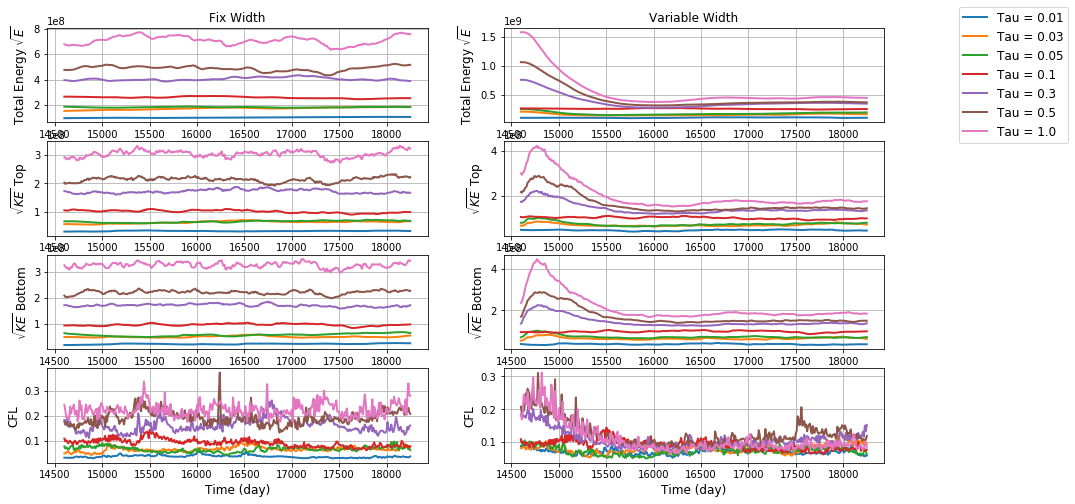

In [19]:
# Plot total energy, layerwise KE, CFL 
leg = ['0.01', '0.03', '0.05', '0.1', '0.3', '0.5', '1.0']

grid_plot = plt.GridSpec(4, 2, wspace=0.2, hspace=0.2)
fig = plt.figure(figsize=[15,8])

ax = fig.add_subplot(grid_plot[0, 0])
ax.plot(ds_FW['Time']/(24*3600*1e9), np.sqrt(ds_FW['En']).transpose(), lw=2)
ax.set_ylabel('Total Energy $\sqrt{E}$',fontsize=12)
#ax.set_xlabel('Time (day)', fontsize=12)
ax.grid()
#ax.set_yscale('log')
ax.set_title('Fix Width', fontsize=12)

ax = fig.add_subplot(grid_plot[0, 1])
ax.plot(ds_VW['Time']/(24*3600*1e9), np.sqrt(ds_VW['En']).transpose(), lw=2)
ax.set_ylabel('Total Energy $\sqrt{E}$',fontsize=12)
#ax.set_xlabel('Time (day)', fontsize=12)
ax.grid()
#ax.set_yscale('log')
ax.set_title('Variable Width', fontsize=12)
ax.legend([ 'Tau = ' + str(lag) for lag in leg], loc='center right', bbox_to_anchor=(1.5, 0.5), fontsize=12)

ax = fig.add_subplot(grid_plot[1, 0])
ax.plot(ds_FW['Time']/(24*3600*1e9), np.sqrt(ds_FW['KE'].isel(Layer=0)).transpose(), lw=2)
ax.set_ylabel('$\sqrt{KE}$ Top',fontsize=12)
#ax.set_xlabel('Time (day)', fontsize=12)
ax.grid()
#ax.set_yscale('log')

ax = fig.add_subplot(grid_plot[1, 1])
ax.plot(ds_VW['Time']/(24*3600*1e9), np.sqrt(ds_VW['KE'].isel(Layer=0)).transpose(), lw=2)
ax.set_ylabel('$\sqrt{KE}$ Top',fontsize=12)
#ax.set_xlabel('Time (day)', fontsize=12)
ax.grid()
#ax.set_yscale('log')

ax = fig.add_subplot(grid_plot[2, 0])
ax.plot(ds_FW['Time']/(24*3600*1e9), np.sqrt(ds_FW['KE'].isel(Layer=1)).transpose(), lw=2)
ax.set_ylabel('$\sqrt{KE}$ Bottom',fontsize=12)
#ax.set_xlabel('Time (day)', fontsize=12)
ax.grid()
#ax.set_yscale('log')

ax = fig.add_subplot(grid_plot[2, 1])
ax.plot(ds_VW['Time']/(24*3600*1e9), np.sqrt(ds_VW['KE'].isel(Layer=1)).transpose(), lw=2)
ax.set_ylabel('$\sqrt{KE}$ Bottom',fontsize=12)
#ax.set_xlabel('Time (day)', fontsize=12)
ax.grid()
#ax.set_yscale('log')

ax = fig.add_subplot(grid_plot[3, 0])
ax.plot(ds_FW['Time']/(24*3600*1e9), ds_FW['max_CFL_lin'].transpose(), lw=2)
ax.set_ylabel('CFL',fontsize=12)
ax.set_xlabel('Time (day)', fontsize=12)
ax.grid()

ax = fig.add_subplot(grid_plot[3, 1])
ax.plot(ds_VW['Time']/(24*3600*1e9), ds_VW['max_CFL_lin'].transpose(), lw=2)
ax.set_ylabel('CFL',fontsize=12)
ax.set_xlabel('Time (day)', fontsize=12)
ax.grid()

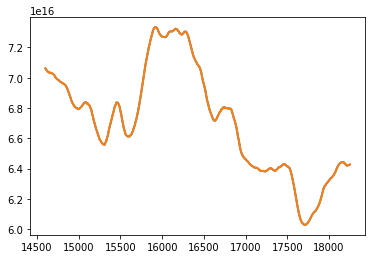

In [21]:
plt.plot(ds_FW['Time']/(24*3600*1e9), ds_FW['En'].isel(tau=3).transpose(), lw=2)
plt.plot(ds_VW['Time']/(24*3600*1e9), ds_VW['En'].isel(tau=3).transpose(), lw=2)

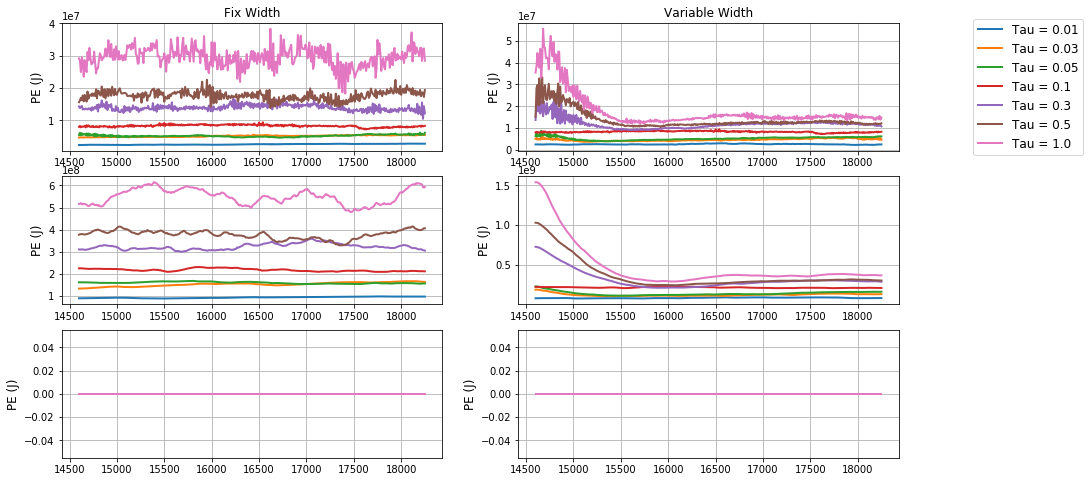

In [5]:
# Potential energy time series (focus on the middle panels, which are the main)
leg = ['0.01', '0.03', '0.05', '0.1', '0.3', '0.5', '1.0']

grid_plot = plt.GridSpec(3, 2, wspace=0.2, hspace=0.2)
fig = plt.figure(figsize=[15,8])

for i in range(0,3):
    
    ax = fig.add_subplot(grid_plot[i,0])
    ax.plot(ds_FW['Time']/(24*3600*1e9), np.sqrt(ds_FW['APE'].isel(Interface=i)).transpose(), lw=2)
    ax.set_ylabel('PE (J)',fontsize=12)
    #ax.set_xlabel('Time (day)', fontsize=12)
    ax.grid()
    
    if(i==0):
        ax.set_title('Fix Width', fontsize=12)
    
    ax = fig.add_subplot(grid_plot[i, 1])
    ax.plot(ds_FW['Time']/(24*3600*1e9), np.sqrt(ds_VW['APE'].isel(Interface=i)).transpose(), lw=2)
    ax.set_ylabel('PE (J)',fontsize=12)
    #ax.set_xlabel('Time (day)', fontsize=12)
    ax.grid()
    
    if(i==0):
        ax.set_title('Variable Width', fontsize=12)
        ax.legend([ 'Tau = ' + str(lag) for lag in leg], loc='center right', 
                  bbox_to_anchor=(1.5, 0.5), fontsize=12)

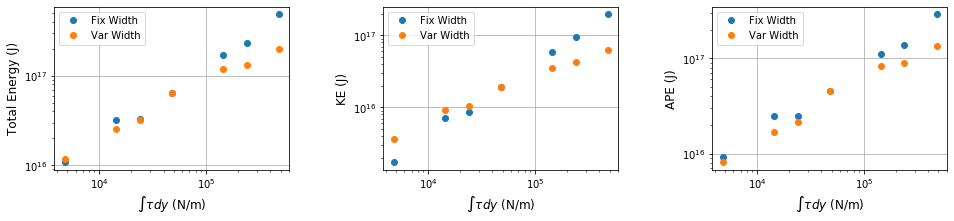

In [8]:
#tau = [0.01, 0.03, 0.05, 0.1, 0.3, 0.5, 1.0]
tau = [4800.,  14400.,  24000.,  48000., 144000., 240000., 480000.]

t_st =180

grid_plot = plt.GridSpec(1, 3, wspace=0.4, hspace=0.2)
fig = plt.figure(figsize=[16,3])

ax = fig.add_subplot(grid_plot[0, 0])
ax.loglog(tau, ds_FW['En'].isel(Time = slice(t_st, len(ds_FW['Time']))).mean('Time'),'o', label='Fix Width')
ax.loglog(tau, ds_VW['En'].isel(Time = slice(t_st, len(ds_VW['Time']))).mean('Time'),'o', label='Var Width')
ax.set_ylabel('Total Energy (J)',fontsize=12)
ax.set_xlabel('$\int \\tau dy$ (N/m)',fontsize=12)
ax.grid()
ax.legend()

ax = fig.add_subplot(grid_plot[0, 1])
ax.loglog(tau, ds_FW['KE'].isel(Time = slice(t_st, len(ds_FW['Time']))).sum('Layer').mean('Time'),'o', label='Fix Width')
ax.loglog(tau, ds_VW['KE'].isel(Time = slice(t_st, len(ds_VW['Time']))).sum('Layer').mean('Time'),'o', label='Var Width')
ax.set_ylabel('KE (J)',fontsize=12)
ax.set_xlabel('$\int \\tau dy$ (N/m)',fontsize=12)
ax.grid()
ax.legend()

ax = fig.add_subplot(grid_plot[0, 2])
ax.loglog(tau, ds_FW['APE'].isel(Time = slice(t_st, len(ds_FW['Time']))).sum('Interface').mean('Time'),'o', label='Fix Width')
ax.loglog(tau, ds_VW['APE'].isel(Time = slice(t_st, len(ds_VW['Time']))).sum('Interface').mean('Time'),'o', label='Var Width')
ax.set_ylabel('APE (J)',fontsize=12)
ax.set_xlabel('$\int \\tau dy$ (N/m)',fontsize=12)
ax.grid()
ax.legend()

$\Large \text{Snapshots of velocity fields and the mean transport}$

In [15]:
# read prog.nc files for all runs (for 20-40 years simulation time)
tau = ['Tau_001', 'Tau_003', 'Tau_005', 'Tau_01', 'Tau_03', 'Tau_05', 'Tau_1']
ppdir = "/work/Hemant.Khatri/MOM6_idealised/SWM_Two_Layer/Barotropic_Baroclinic/"

dataset_FW = []
dataset_VW = []

for i in range(0, len(tau)):
    d = xr.open_dataset(ppdir+"2L_fplane_Fix_Width/"+tau[i]+"/prog_40.nc", chunks={'Time': 10}) # specifying chunks is required
    dataset_FW.append(d)
    d = xr.open_dataset(ppdir+"2L_fplane_Var_Width/"+tau[i]+"/prog_40.nc", chunks={'Time': 10}) # for parallel computations
    if(i != 3):
        d = d.drop('taux_bot')
    dataset_VW.append(d)
    
ds_FW1 = xr.concat(dataset_FW, dim='tau')
ds_VW1 = xr.concat(dataset_VW, dim='tau')

In [16]:
ds_FW1

<xarray.Dataset>
Dimensions:  (Time: 121, tau: 7, xh: 400, xq: 400, yh: 800, yq: 800, zi: 3, zl: 2)
Coordinates:
  * Time     (Time) object 0021-02-25 00:00:00 ... 0040-11-12 00:00:00
  * xh       (xh) float64 2.0 6.0 10.0 14.0 ... 1.59e+03 1.594e+03 1.598e+03
  * zl       (zl) float64 1.027e+03 1.028e+03
  * yh       (yh) float64 -1.598e+03 -1.594e+03 ... 1.594e+03 1.598e+03
  * xq       (xq) float64 4.0 8.0 12.0 16.0 ... 1.592e+03 1.596e+03 1.6e+03
  * zi       (zi) float64 1.027e+03 1.028e+03 1.028e+03
  * yq       (yq) float64 -1.596e+03 -1.592e+03 -1.588e+03 ... 1.596e+03 1.6e+03
Dimensions without coordinates: tau
Data variables:
    u        (tau, Time, zl, yh, xq) float32 dask.array<chunksize=(1, 10, 2, 800, 400), meta=np.ndarray>
    v        (tau, Time, zl, yq, xh) float32 dask.array<chunksize=(1, 10, 2, 800, 400), meta=np.ndarray>
    h        (tau, Time, zl, yh, xh) float32 dask.array<chunksize=(1, 10, 2, 800, 400), meta=np.ndarray>
    e        (tau, Time, zi, yh, xh) floa

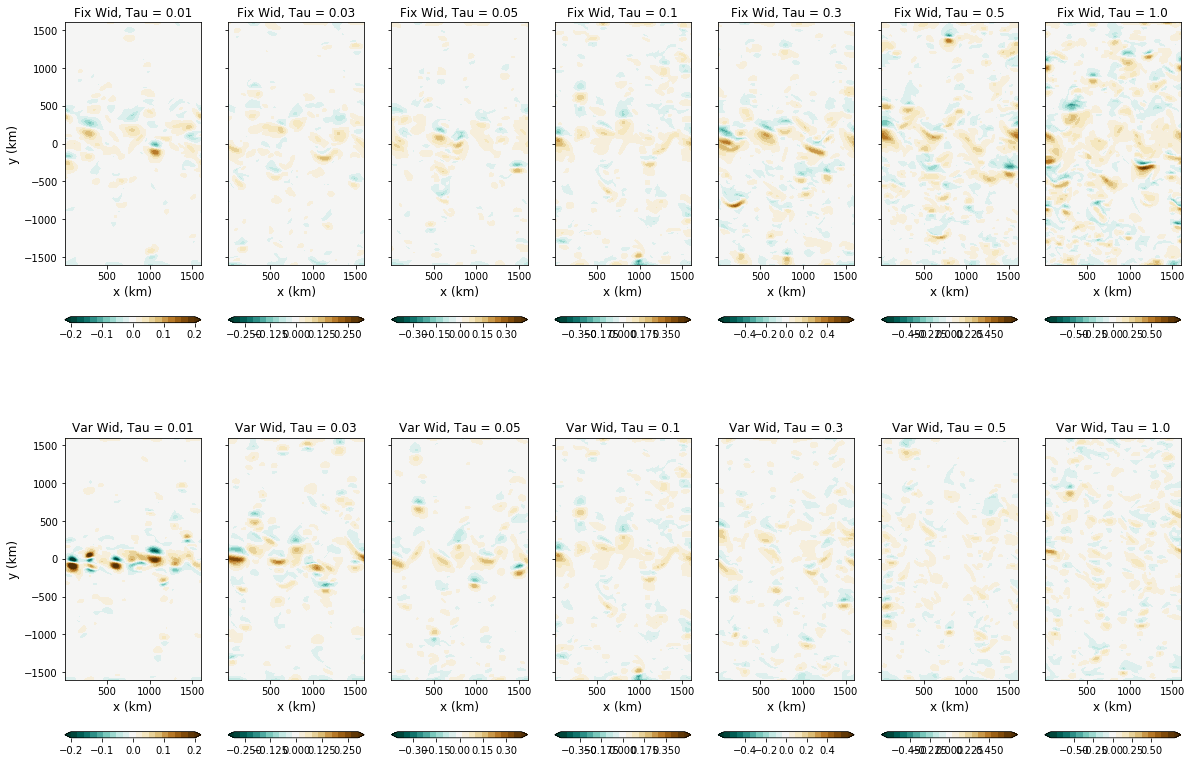

In [17]:
# Plot zonal velocity (u) snapshots
leg = ['0.01', '0.03', '0.05', '0.1', '0.3', '0.5', '1.0']

idx = 110

grid_plot = plt.GridSpec(2, 7, wspace=0.2, hspace=0.2)
fig = plt.figure(figsize=[20,14])

for i in range(0, ds_FW1.tau.shape[0]):
    
    levels = np.linspace(-0.2 - i*0.1, 0.2 + i*0.1, num=20)
    lev_ticks = np.linspace(-0.2 - i*0.05, 0.2 + i*0.05, num=5)
    
    ax = fig.add_subplot(grid_plot[0,i])
    img = ax.contourf(ds_FW1['xq'], ds_FW1['yh'], ds_FW1['u'].isel(Time=idx, zl=0, tau=i), 
                      levels=levels, cmap='BrBG_r', extend='both')
    if(i==0):
        ax.set_ylabel('y (km)',fontsize=12)
    else:
        ax.set_yticklabels([])
    ax.set_xlabel('x (km)', fontsize=12)
    ax.set_title('Fix Wid, Tau = ' + leg[i], fontsize=12)
    #ax.colorbar()
    cbar = fig.colorbar(img, ax=ax, orientation="horizontal")
    cbar.set_ticks(lev_ticks)
    
    ax = fig.add_subplot(grid_plot[1,i])
    img = ax.contourf(ds_VW1['xq'], ds_VW1['yh'], ds_VW1['u'].isel(Time=idx, zl=0, tau=i), 
                      levels=levels, cmap='BrBG_r', extend='both')
    if(i==0):
        ax.set_ylabel('y (km)',fontsize=12)
    else:
        ax.set_yticklabels([])
    ax.set_xlabel('x (km)', fontsize=12)
    ax.set_title('Var Wid, Tau = ' + leg[i], fontsize=12)
    cbar = fig.colorbar(img, ax=ax, orientation="horizontal")
    cbar.set_ticks(lev_ticks)
    #ax.colorbar()

#fig.tight_layout()

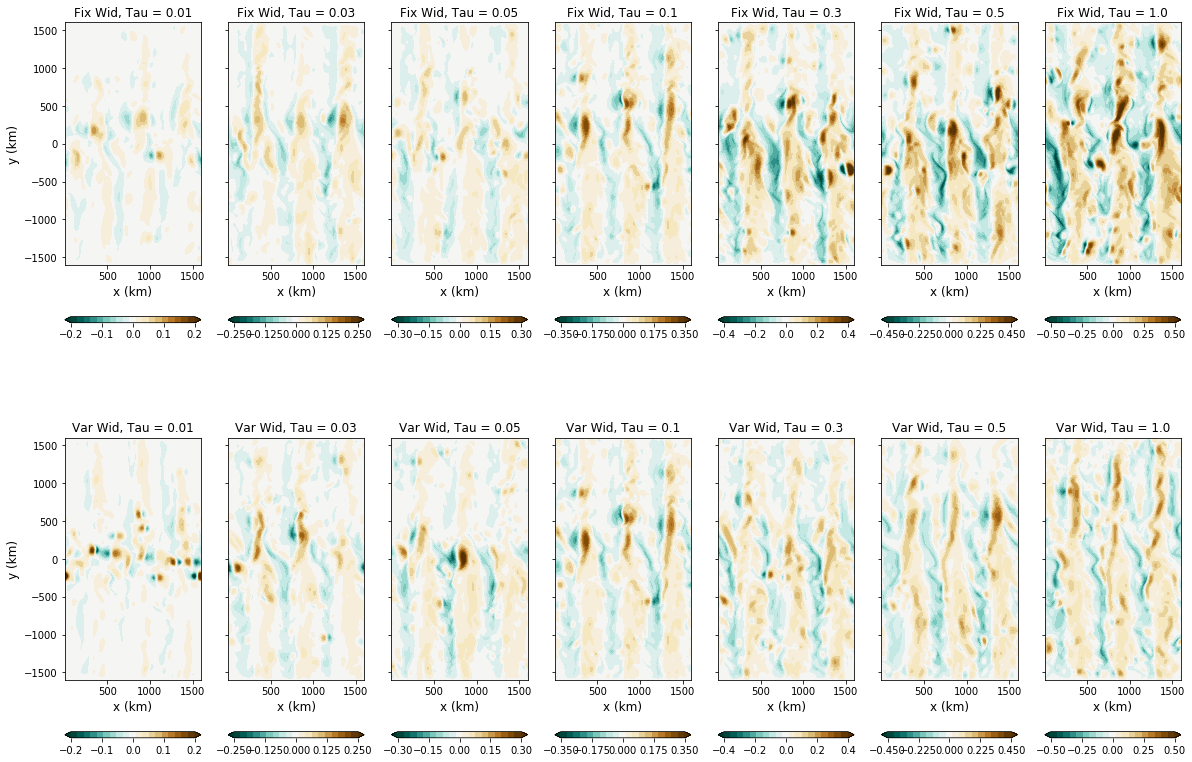

In [18]:
# Plot meridional velocity (v) snapshots
leg = ['0.01', '0.03', '0.05', '0.1', '0.3', '0.5', '1.0']

idx = 120

grid_plot = plt.GridSpec(2, 7, wspace=0.2, hspace=0.2)
fig = plt.figure(figsize=[20,14])

for i in range(0, ds_FW1.tau.shape[0]):
    
    levels = np.linspace(-0.2 - i*0.05, 0.2 + i*0.05, num=20)
    lev_ticks = np.linspace(-0.2 - i*0.05, 0.2 + i*0.05, num=5)
    
    ax = fig.add_subplot(grid_plot[0,i])
    img = ax.contourf(ds_FW1['xh'], ds_FW1['yq'], ds_FW1['v'].isel(Time=idx, zl=0, tau=i), 
                      levels=levels, cmap='BrBG_r', extend='both')
    if(i==0):
        ax.set_ylabel('y (km)',fontsize=12)
    else:
        ax.set_yticklabels([])
    ax.set_xlabel('x (km)', fontsize=12)
    ax.set_title('Fix Wid, Tau = ' + leg[i], fontsize=12)
    #ax.colorbar()
    cbar = fig.colorbar(img, ax=ax, orientation="horizontal")
    cbar.set_ticks(lev_ticks)
    
    ax = fig.add_subplot(grid_plot[1,i])
    img = ax.contourf(ds_VW1['xh'], ds_VW1['yq'], ds_VW1['v'].isel(Time=idx, zl=0, tau=i), 
                      levels=levels, cmap='BrBG_r', extend='both')
    if(i==0):
        ax.set_ylabel('y (km)',fontsize=12)
    else:
        ax.set_yticklabels([])
    ax.set_xlabel('x (km)', fontsize=12)
    ax.set_title('Var Wid, Tau = ' + leg[i], fontsize=12)
    cbar = fig.colorbar(img, ax=ax, orientation="horizontal")
    cbar.set_ticks(lev_ticks)
    #ax.colorbar()

#fig.tight_layout()

In [19]:
# Time evolution of zonal and meridional transport

grid_FW = Grid(ds_FW1, coords={'X': {'center': 'xh', 'right': 'xq'},
                            'Y': {'center': 'yh', 'right': 'yq'}}, periodic=['X']);
grid_VW = Grid(ds_VW1, coords={'X': {'center': 'xh', 'right': 'xq'},
                            'Y': {'center': 'yh', 'right': 'yq'}}, periodic=['X']);
dy = 4000.

#umo_FW = (ds_FW1['u'] * grid_FW.interp(ds_FW1['h'], 'X', boundary='fill') * dy).mean('xq').sum('yh').compute()
#umo_VW = (ds_VW1['u'] * grid_VW.interp(ds_VW1['h'], 'X', boundary='fill') * dy).mean('xq').sum('yh').compute()
# .sel(yh=slice(-600, 600))

umo_FW = (ds_FW1['uh'].mean('xq').sum('yh')).compute()
umo_VW = (ds_VW1['uh'].mean('xq').sum('yh')).compute()

vmo_FW = (ds_FW1['vh'].mean('yq').sum('xh')).compute()
vmo_VW = (ds_VW1['vh'].mean('yq').sum('xh')).compute()

In [20]:
#(ds_FW1['u']*grid.interp(ds_FW1['h'], 'X', boundary='fill')).isel(Time = 100, zl=0, tau=3).plot()
#(ds_FW1['u'].isel(xq=100)*0.5*(ds_FW1['h'].isel(xh=100) + ds_FW1['h'].isel(xh=101))).isel(Time = 50, zl=0, tau=6).plot()

#plt.subplot(1,2,1)
#(ds_VW1['uh']).isel(Time = 100, zl=0, tau=4).plot()

#plt.subplot(1,2,2)
#(ds_VW1['vh']).isel(Time = 100, zl=0, tau=4).plot()

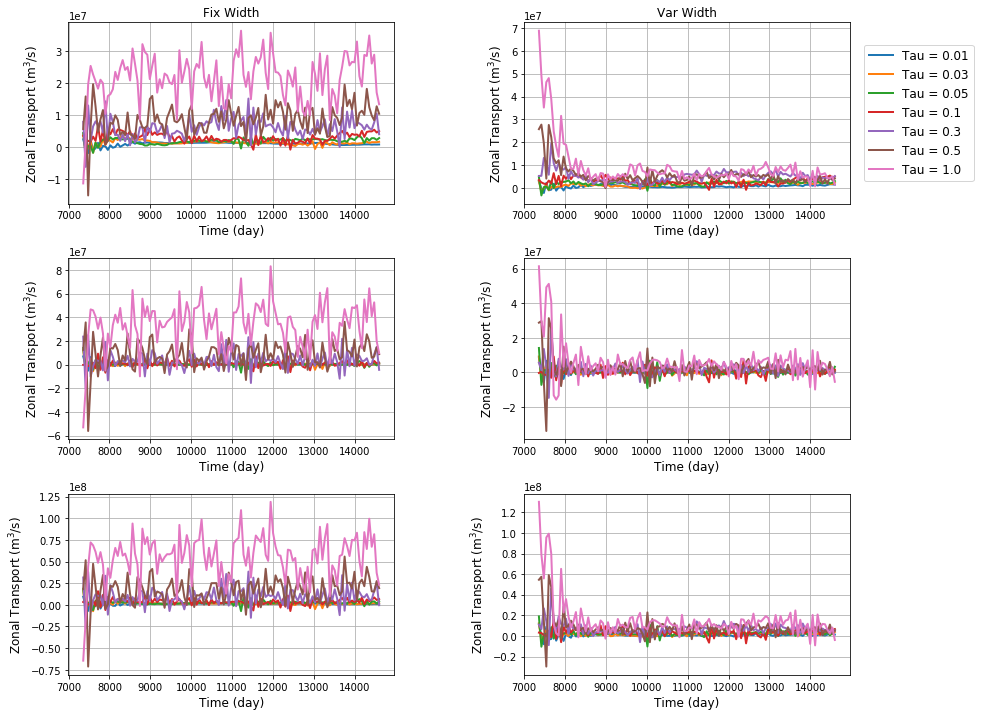

In [21]:
# Plot zonal transport time series
# (top panels for top layer, middle panels for bottom layer and lower panels for barotropic transport)

leg = ['0.01', '0.03', '0.05', '0.1', '0.3', '0.5', '1.0']

grid_plot = plt.GridSpec(3, 2, wspace=0.4, hspace=0.3)
fig = plt.figure(figsize=[14,12])
tim = np.linspace(60. + 7300., 7300. + 7300., len(ds_FW1['Time']), endpoint=True)

for i in range(0,3):
    
    if(i==0):
        tmp = umo_FW.isel(zl=0)
    elif(i==1):
        tmp = umo_FW.isel(zl=1)
    else:
        tmp = umo_FW.sum('zl')
    
    ax = fig.add_subplot(grid_plot[i, 0])
    ax.plot(tim, tmp.transpose(), lw=2)
    ax.set_ylabel('Zonal Transport (m$^3$/s)',fontsize=12)
    ax.set_xlabel('Time (day)', fontsize=12)
    ax.grid()
    #ax.set_yscale('log')
    if(i==0):
        ax.set_title('Fix Width', fontsize=12)
    
    if(i==0):
        tmp = umo_VW.isel(zl=0)
    elif(i==1):
        tmp = umo_VW.isel(zl=1)
    else:
        tmp = umo_VW.sum('zl')
        
    ax = fig.add_subplot(grid_plot[i, 1])
    ax.plot(tim, tmp.transpose(), lw=2)
    ax.set_ylabel('Zonal Transport (m$^3$/s)',fontsize=12)
    ax.set_xlabel('Time (day)', fontsize=12)
    ax.grid()
    #ax.set_yscale('log')
    if(i==0):
        ax.set_title('Var Width', fontsize=12)
        ax.legend([ 'Tau = ' + str(lag) for lag in leg], loc='center right', bbox_to_anchor=(1.4, 0.5), fontsize=12)

Text(0.5, 0, 'Wind Stress')

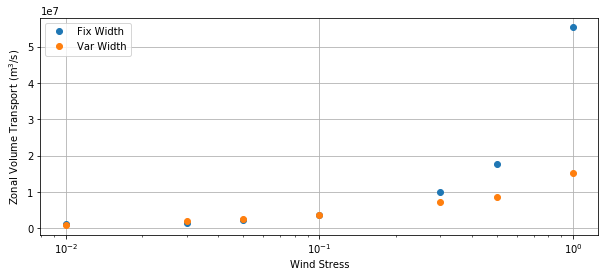

In [22]:
tau = [0.01, 0.03, 0.05, 0.1, 0.3, 0.5, 1.0]

fig = plt.figure(figsize=[10,4])
plt.semilogx(tau, umo_FW.sum('zl').mean('Time'),'o', label='Fix Width')
plt.semilogx(tau, umo_VW.sum('zl').mean('Time'),'o', label='Var Width')
plt.grid()
plt.legend()
plt.ylabel('Zonal Volume Transport (m$^3$/s)')
plt.xlabel('Wind Stress')

Text(0.5, 0, 'Wind Stress')

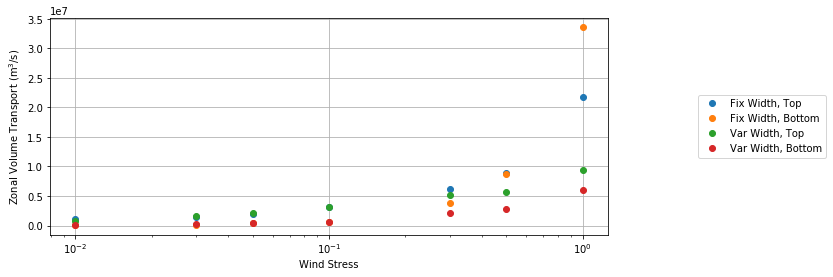

In [23]:
tau = [0.01, 0.03, 0.05, 0.1, 0.3, 0.5, 1.0]

fig = plt.figure(figsize=[10,4])
plt.semilogx(tau, umo_FW.isel(zl=0).mean('Time'),'o', label='Fix Width, Top')
plt.semilogx(tau, umo_FW.isel(zl=1).mean('Time'),'o', label='Fix Width, Bottom')
plt.semilogx(tau, umo_VW.isel(zl=0).mean('Time'),'o', label='Var Width, Top')
plt.semilogx(tau, umo_VW.isel(zl=1).mean('Time'),'o', label='Var Width, Bottom')
plt.grid()
plt.legend(loc='center right', bbox_to_anchor=(1.4, 0.5))
plt.ylabel('Zonal Volume Transport (m$^3$/s)')
plt.xlabel('Wind Stress')

Text(0.5, 0, 'Wind Stress')

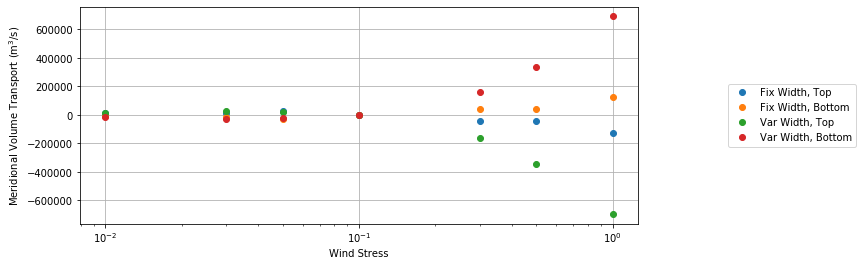

In [24]:
tau = [0.01, 0.03, 0.05, 0.1, 0.3, 0.5, 1.0]

fig = plt.figure(figsize=[10,4])
plt.semilogx(tau, vmo_FW.isel(zl=0).mean('Time'),'o', label='Fix Width, Top')
plt.semilogx(tau, vmo_FW.isel(zl=1).mean('Time'),'o', label='Fix Width, Bottom')
plt.semilogx(tau, vmo_VW.isel(zl=0).mean('Time'),'o', label='Var Width, Top')
plt.semilogx(tau, vmo_VW.isel(zl=1).mean('Time'),'o', label='Var Width, Bottom')
plt.grid()
plt.legend(loc='center right', bbox_to_anchor=(1.4, 0.5))
plt.ylabel('Meridional Volume Transport (m$^3$/s)')
plt.xlabel('Wind Stress')

In [25]:
ds_FW.close()
ds_VW.close()
ds_FW1.close()
ds_VW1.close()
client.close()
cluster.close()

In [15]:
ds_FW.close()
ds_VW.close()